In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import sys
import subprocess
import datetime as dt
import itertools
from dask.distributed import Client, LocalCluster, wait
import dask.array as da
import cmocean
from MHW_daily_calcs import *

Plot SEDI based on daily forecasts at leads of 1.5, 3.5, 6.5, .5 months ~ 45, 105, 195, 15 days
- out of order to align with monthly plots for 1st 3

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=False
smoothClim=True
meth=method
win=halfwin
qtvar='qt1'
delt=15

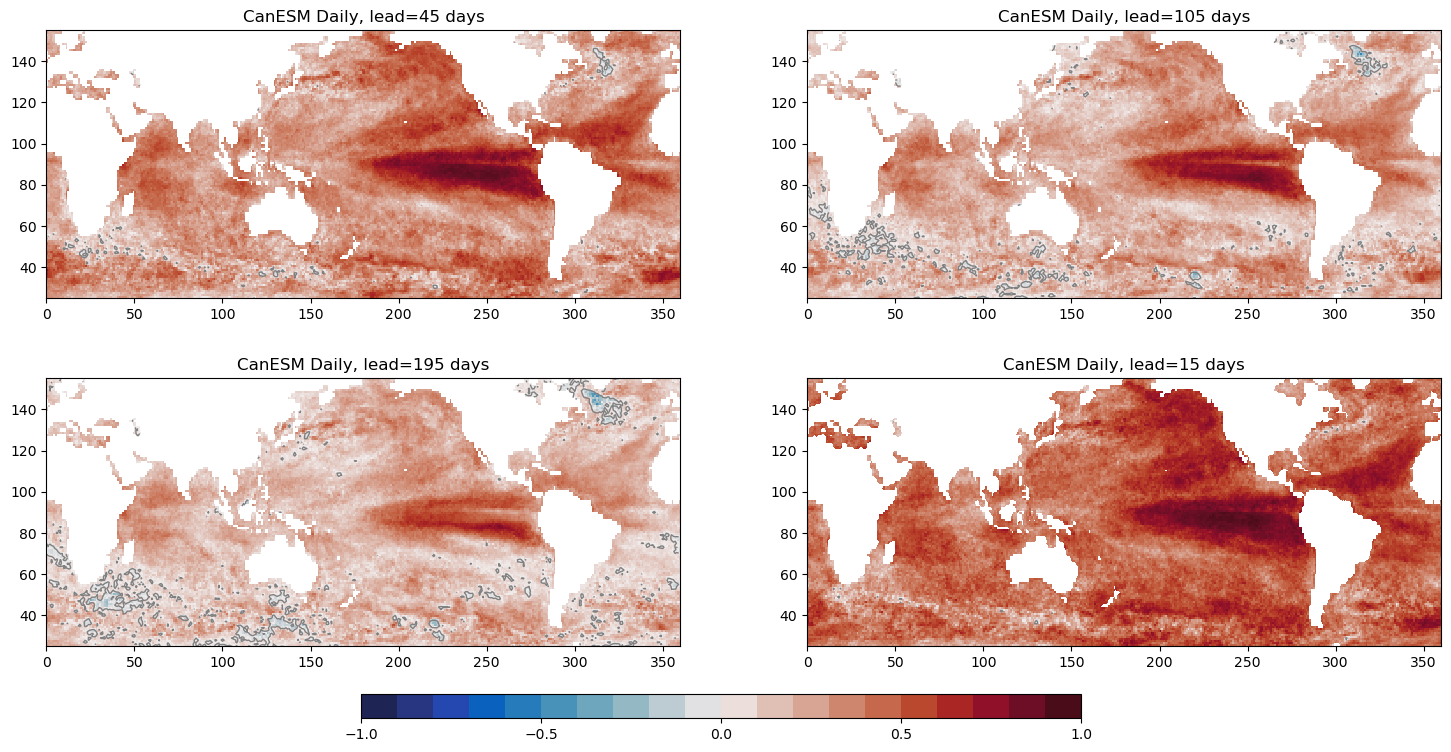

In [3]:
leadlist=[ 45, 105, 195, 15]
fSEDI={}
for ilead in leadlist:
    fSEDI[ilead]=xr.open_mfdataset([fnameSEDI_OISST_CanESM_daily(ilead,climyrs, smoothClim, meth, win, detr, qtile, delt, qtvar, jj) \
                                    for jj in (0,60,120)],combine='nested')
SEDICan=dict()
fig,axs=plt.subplots(2,2,figsize=(18,8),gridspec_kw={'hspace':.3})
ax=axs[0,0]; il=leadlist[0]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[0,1]; il=leadlist[1]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[1,0]; il=leadlist[2]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[1,1]; il=leadlist[3]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ml=fig.add_axes([.3,.02,.4,.03])
fig.colorbar(m,cax=ml,orientation='horizontal',ticks=[-1.0,-.5,0,.5,1.0])
for el in fSEDI.keys():
    fSEDI[el].close()
del fSEDI

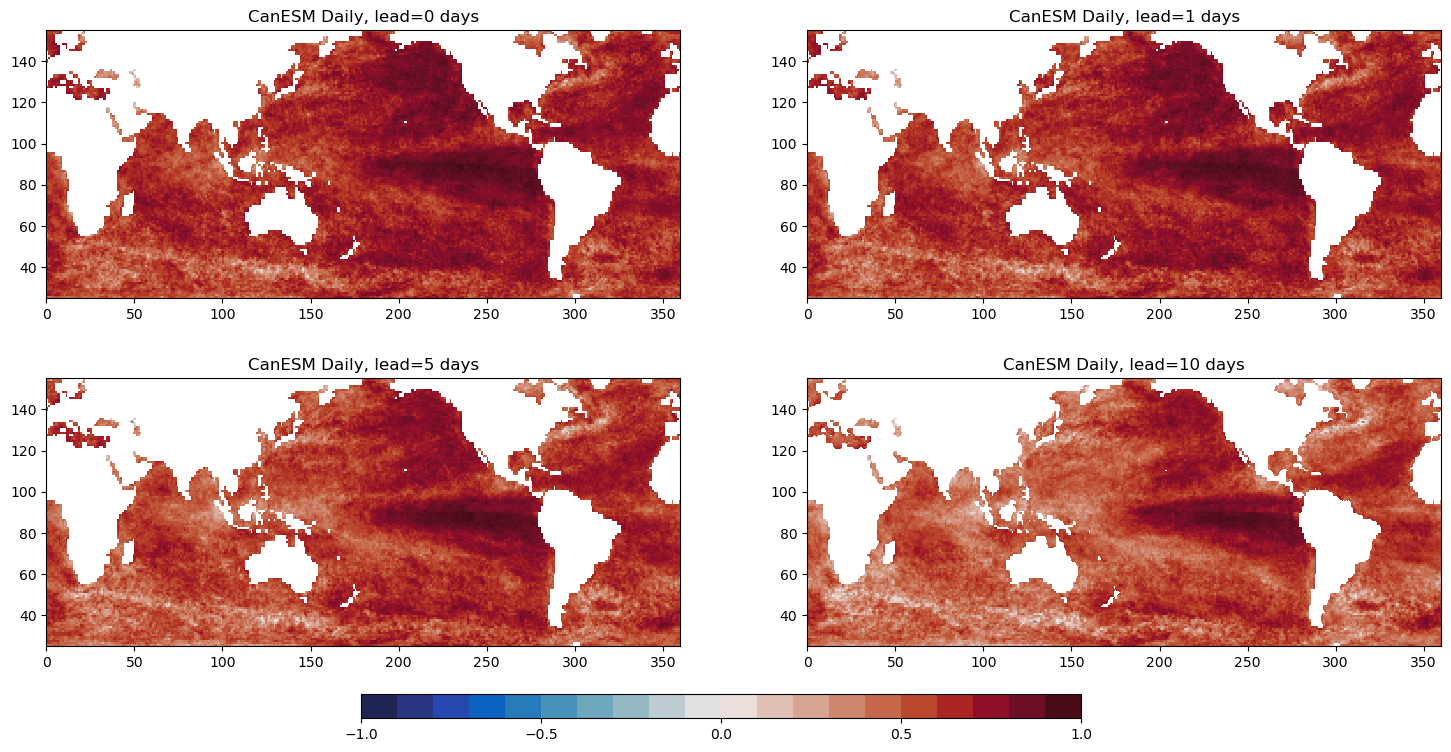

In [4]:
leadlist=[ 0, 1, 5, 10]
fSEDI={}
for ilead in leadlist:
    fSEDI[ilead]=xr.open_mfdataset([fnameSEDI_OISST_CanESM_daily(ilead,climyrs, smoothClim, meth, win, detr, qtile, delt, qtvar, jj) \
                                    for jj in (0,60,120)],combine='nested')
SEDICan=dict()
fig,axs=plt.subplots(2,2,figsize=(18,8),gridspec_kw={'hspace':.3})
ax=axs[0,0]; il=leadlist[0]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[0,1]; il=leadlist[1]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[1,0]; il=leadlist[2]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[1,1]; il=leadlist[3]
lm=fSEDI[il].lmask
SEDI=fSEDI[il].SEDI
m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM Daily, lead={il} days')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ml=fig.add_axes([.3,.02,.4,.03])
fig.colorbar(m,cax=ml,orientation='horizontal',ticks=[-1.0,-.5,0,.5,1.0])
for el in fSEDI.keys():
    fSEDI[el].close()
del fSEDI

### plot SEDI versus time for specific areas

In [5]:
# load daily SEDI files
lmax=215
fSEDI=xr.open_mfdataset([[fnameSEDI_OISST_CanESM_daily(ilead,climyrs, smoothClim, meth, win, detr, qtile, delt, qtvar, jj) \
                                    for jj in (0,60,120)] for ilead in range(0,lmax)],combine='nested',concat_dim=['lead','lat'],parallel=True)
lts=np.array([float(el)/24 for el in fSEDI.leadtime.values/3600*1e-9])

In [6]:
# load monthly SEDI files for comparison
fSEDIm={}
for il in (0,1,2,3,4,5,6):
    #fSEDIm[il]=xr.open_dataset(f'/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/SEDI_CanHCNew_l{il}_detrended_1991_2020.nc')
    fSEDIm[il]=xr.open_dataset(f'/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/mhw/detrended/SEDI_MME_CanESM5_GEM5.2-NEMO_l{il}_detrended_1991_2020.nc')

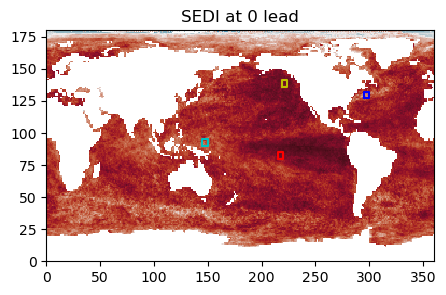

In [7]:
fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.pcolormesh(fSEDI['SEDI'].isel(lead=0),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
ax.set_title('SEDI at 0 lead')
p1=[215,220,80,85]
ax.plot([p1[0],p1[1],p1[1],p1[0],p1[0]],[p1[2],p1[2],p1[3],p1[3],p1[2]],'-',color='r')
p2=[295,300,127,132]
p=p2
ax.plot([p[0],p[1],p[1],p[0],p[0]],[p[2],p[2],p[3],p[3],p[2]],'-',color='b')
p3=[219,224,136,141]
p=p3
ax.plot([p[0],p[1],p[1],p[0],p[0]],[p[2],p[2],p[3],p[3],p[2]],'-',color='y')
p4=[145,150,90,95]
p=p4
ax.plot([p[0],p[1],p[1],p[0],p[0]],[p[2],p[2],p[3],p[3],p[2]],'-',color='c')

(-0.5, 1.0)

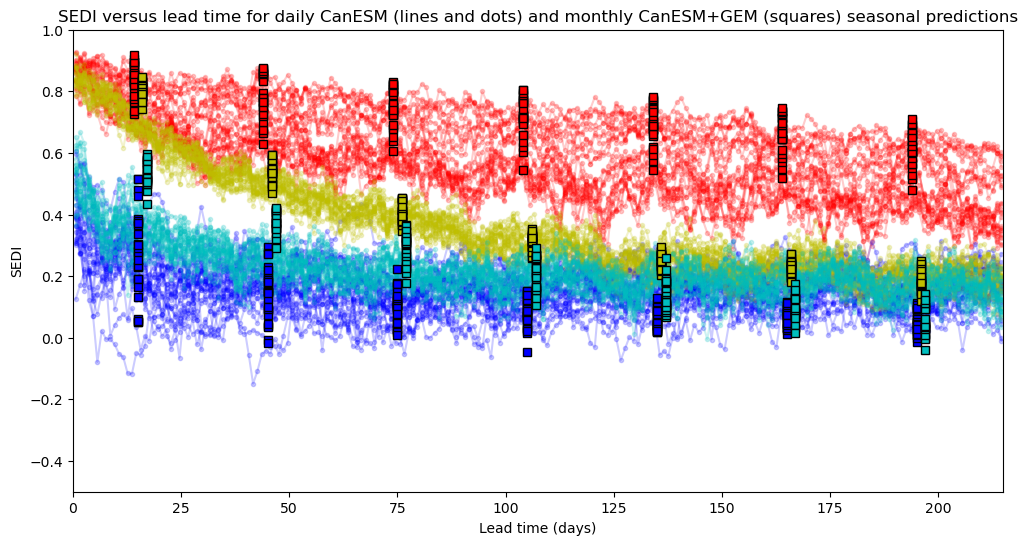

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
p=p1
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='r',alpha=.2)
p=p2
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='b',alpha=.2)
p=p3
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='y',alpha=.2)
p=p4
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='c',alpha=.2)
        
p=p1
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30-1,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='r',markeredgecolor='k')
p=p2
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='b',markeredgecolor='k')
p=p3
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30+1,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='y',markeredgecolor='k')
p=p4
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30+2,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='c',markeredgecolor='k')
            
ax.set_xlim(0,lmax)
ax.set_xlabel('Lead time (days)')
ax.set_ylabel('SEDI')
ax.set_title('SEDI versus lead time for daily CanESM (lines and dots) and monthly CanESM+GEM (squares) seasonal predictions')
ax.set_ylim(-.5,1)

(-0.5, 1.0)

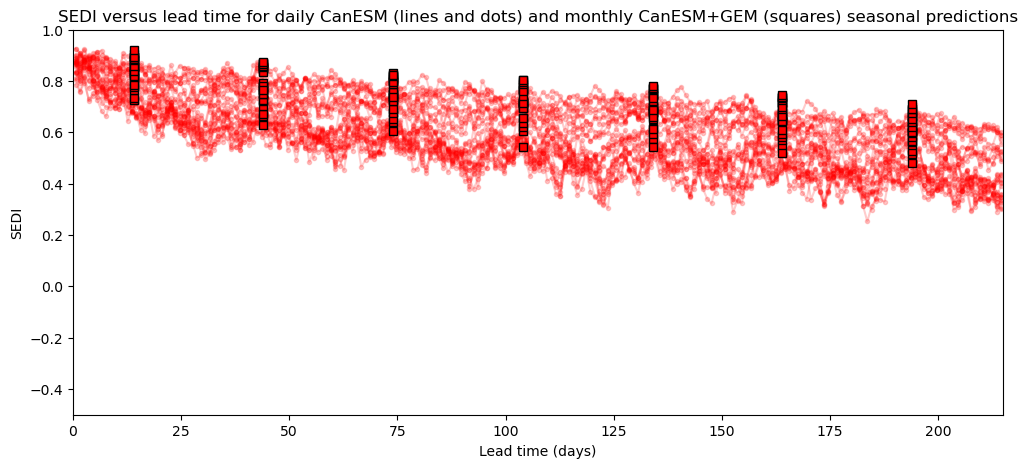

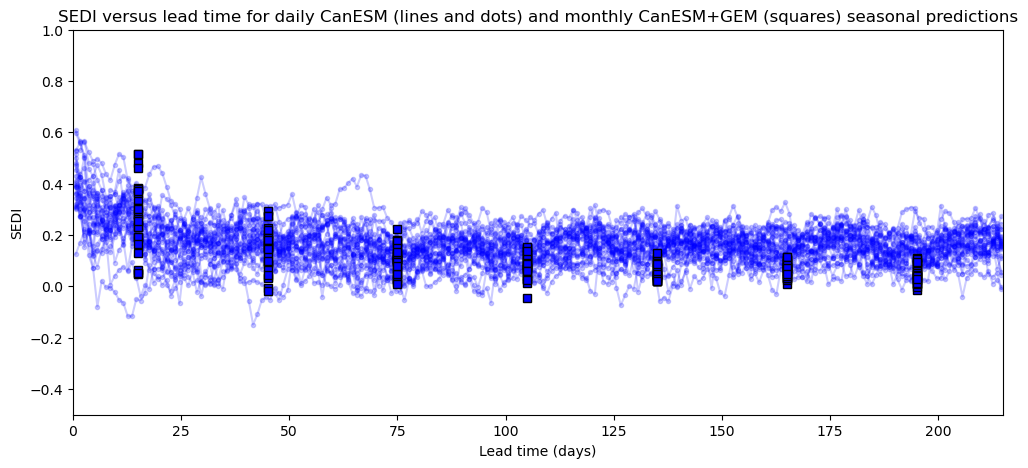

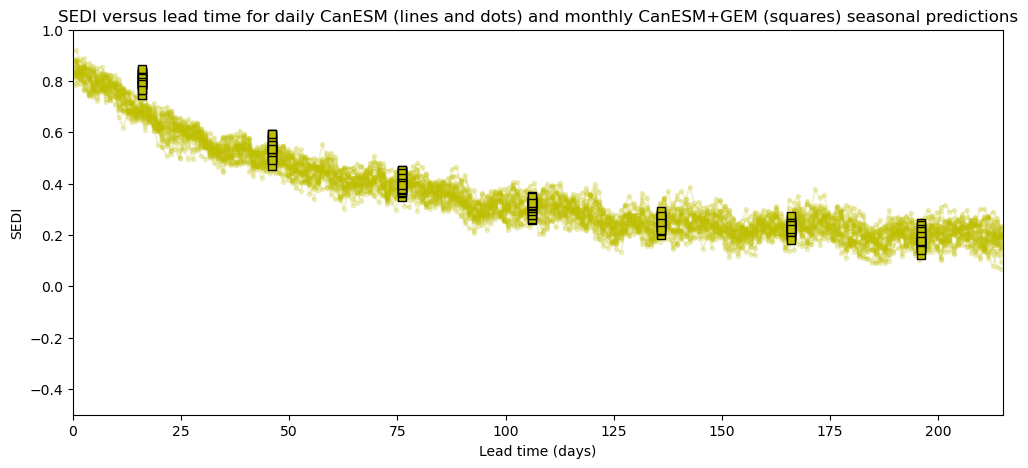

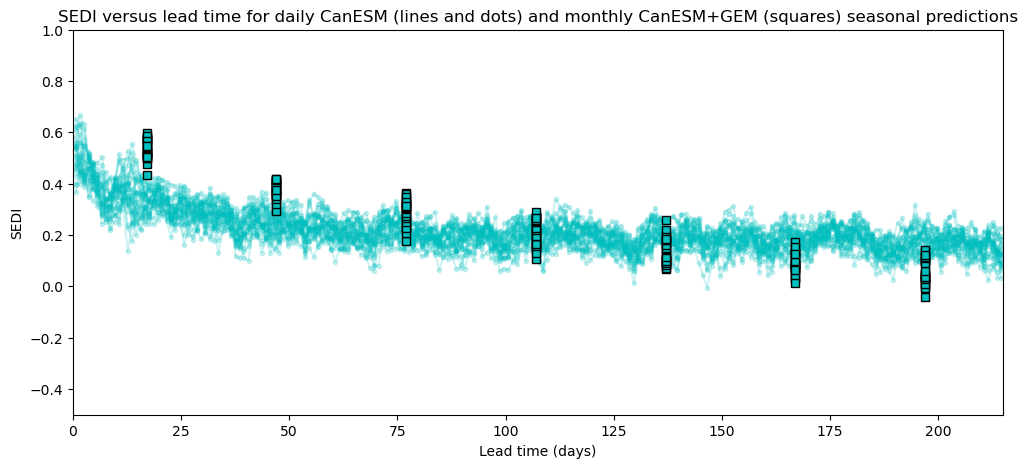

In [9]:
p=p1
fig,ax=plt.subplots(1,1,figsize=(12,5))
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='r',alpha=.2)
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30-1,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='r',markeredgecolor='k')
ax.set_xlim(0,lmax)
ax.set_xlabel('Lead time (days)')
ax.set_ylabel('SEDI')
ax.set_title('SEDI versus lead time for daily CanESM (lines and dots) and monthly CanESM+GEM (squares) seasonal predictions')
ax.set_ylim(-.5,1)
p=p2
fig,ax=plt.subplots(1,1,figsize=(12,5))
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='b',alpha=.2)
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='b',markeredgecolor='k')
ax.set_xlim(0,lmax)
ax.set_xlabel('Lead time (days)')
ax.set_ylabel('SEDI')
ax.set_title('SEDI versus lead time for daily CanESM (lines and dots) and monthly CanESM+GEM (squares) seasonal predictions')
ax.set_ylim(-.5,1)
p=p3
fig,ax=plt.subplots(1,1,figsize=(12,5))
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='y',alpha=.2)
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30+1,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='y',markeredgecolor='k')
ax.set_xlim(0,lmax)
ax.set_xlabel('Lead time (days)')
ax.set_ylabel('SEDI')
ax.set_title('SEDI versus lead time for daily CanESM (lines and dots) and monthly CanESM+GEM (squares) seasonal predictions')
ax.set_ylim(-.5,1)

p=p4
fig,ax=plt.subplots(1,1,figsize=(12,5))
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        ax.plot(lts,fSEDI['SEDI'].isel(lat=ilat,lon=ilon),'.-',color='c',alpha=.2)
for ilat in range(p[2],p[3]):
    for ilon in range(p[0],p[1]):
        for il in fSEDIm.keys():
            ax.plot((il+.5)*30+2,fSEDIm[il]['SEDI'].isel(Y=ilat,X=ilon),'s',markerfacecolor='c',markeredgecolor='k')
            
ax.set_xlim(0,lmax)
ax.set_xlabel('Lead time (days)')
ax.set_ylabel('SEDI')
ax.set_title('SEDI versus lead time for daily CanESM (lines and dots) and monthly CanESM+GEM (squares) seasonal predictions')
ax.set_ylim(-.5,1)